In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import pandas as pd

import mlgrad.pca as pca

In [2]:
df = pd.read_csv("data/octane.csv", sep=',', index_col='Sample')
df

,Material1,Material2,Material3,Condition,Octane
Sample,,,,,
1,55.33,1.72,54,1.66219,92.19
2,59.13,1.20,53,1.58399,92.74
3,57.39,1.42,55,1.61731,91.88
4,56.43,1.78,55,1.66228,92.80
5,55.98,1.58,54,1.63195,92.56
...,...,...,...,...,...
78,67.60,1.84,55,1.64758,91.86
79,64.81,2.24,54,1.69592,91.61
80,63.13,1.60,52,1.66118,92.17


In [3]:
XY = df.values
XY0 = XY[:,:-1]

In [48]:
N = len(XY0)
(N - 2) / N

0.975609756097561

In [22]:
# qf = af.averaging_function("WM", rhofunc=func.Power(1.1, 0.01), alpha=0.86)
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.93)
amf = af.averaging_function("AM")

In [23]:
c = pca.find_rob_center(XY0, wma)
print(c)

[61.75024387  1.26695125 55.29268296  1.63698354]


In [24]:
XY1 = XY0 - c
# S = XY1.T @ XY1
# X2 = XY2[:,0]
# Y2 = XY2[:,1]
# print(S)

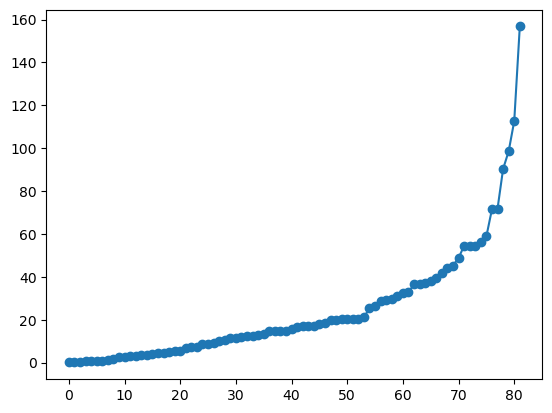

[ 0.97240663 -0.09180847  0.21437045 -0.00646958]


In [25]:
a0, L0 = pca.find_pc(XY1)
plt.plot(sorted(pca.distance_line(XY1, a0)), marker='o')
plt.show()
print(a0)

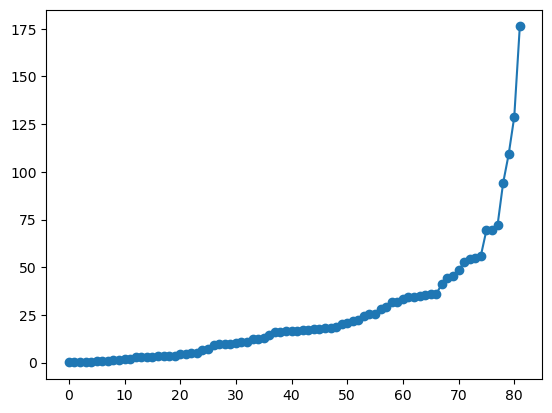

12547.146289260945 [ 0.98154247 -0.09618344  0.16524131 -0.00429278]


In [26]:
a1, L1 = pca.find_rob_pc(XY1, wma)
plt.plot(sorted(pca.distance_line(XY1, a1)), marker='o')
plt.show()
print(L1, a1)

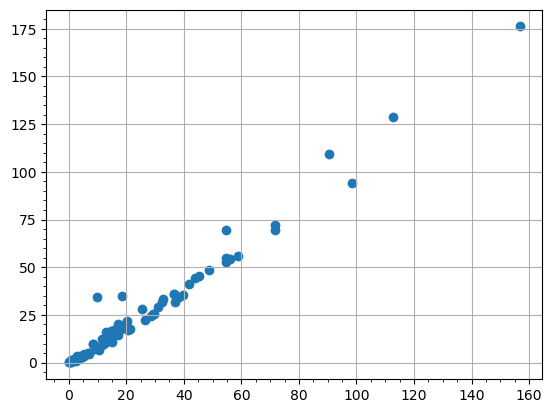

In [27]:
plt.scatter(pca.distance_line(XY1, a0), pca.distance_line(XY1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [28]:
XY2 = pca.project(XY1, a1)

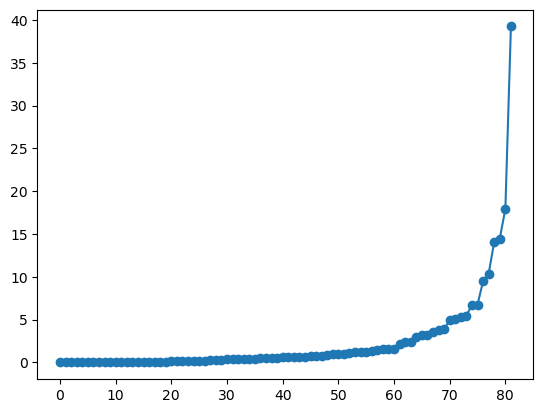

1844.0703212877133 [-0.16529279  0.00805701  0.98578116 -0.02913569]


In [46]:
a2_0, L2_0 = pca.find_pc(XY2)
plt.plot(sorted(pca.distance_line(XY2, a2_0)), marker='o')
plt.show()
print(L2_0, a2_0)

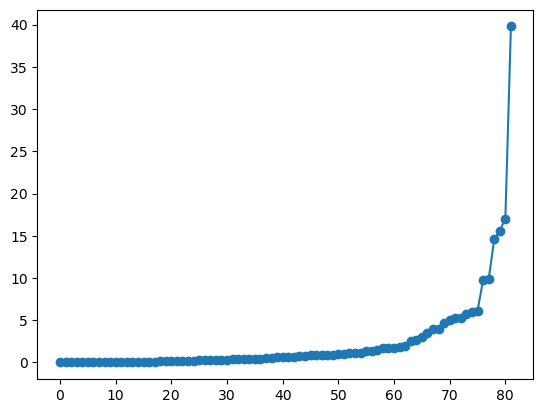

1846.2581062797774 [-0.16206442  0.040545    0.98550657 -0.02946226]


In [37]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.95)
a2, L2 = pca.find_rob_pc(XY2, wma)
plt.plot(sorted(pca.distance_line(XY2, a2)), marker='o')
plt.show()
print(L2, a2)

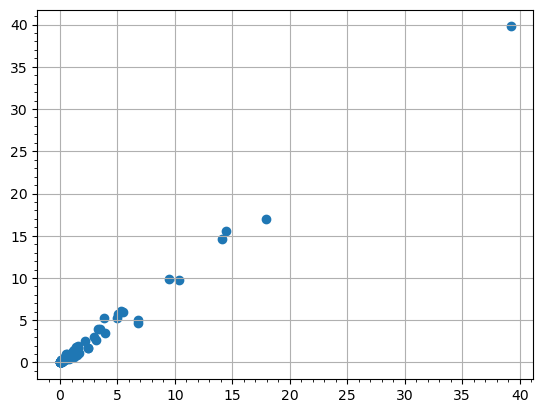

In [45]:
plt.scatter(pca.distance_line(XY2, a2_0), pca.distance_line(XY2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [43]:
XY3 = pca.project(XY2, a2)

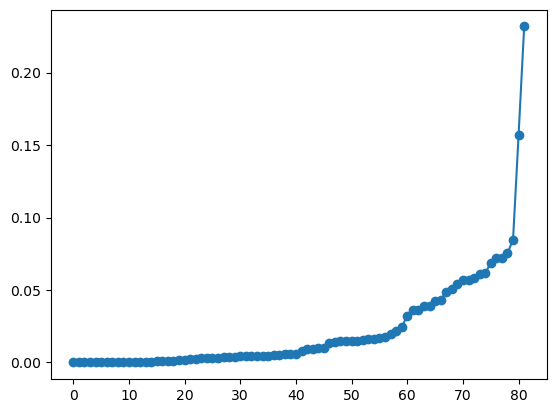

196.57894886105115 [ 0.10153424  0.9944699  -0.0245416  -0.01086854]


In [47]:
a3_0, L3_0 = pca.find_pc(XY3)
plt.plot(sorted(pca.distance_line(XY3, a3_0)), marker='o')
plt.show()
print(L3_0, a3_0)

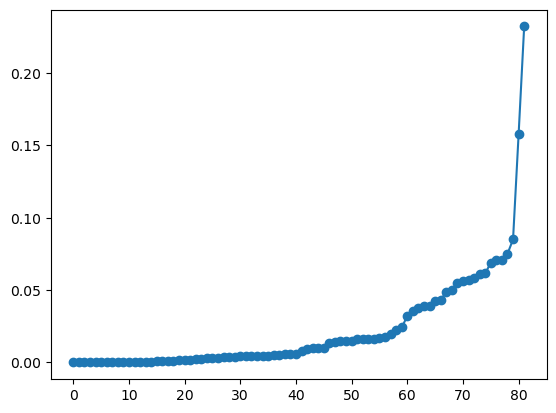

199.5852911334034 [ 0.1015337   0.99445888 -0.02456857 -0.01178294]


In [49]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.97)
a3, L3 = pca.find_rob_pc(XY3, wma)
plt.plot(sorted(pca.distance_line(XY3, a3)), marker='o')
plt.show()
print(L3, a3)

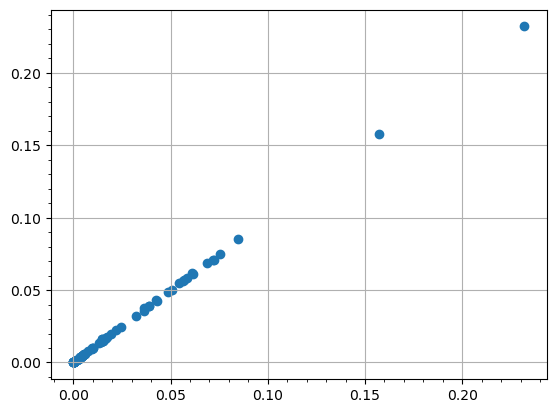

In [50]:
plt.scatter(pca.distance_line(XY3, a3_0), pca.distance_line(XY3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [51]:
XY4 = pca.project(XY3, a3)

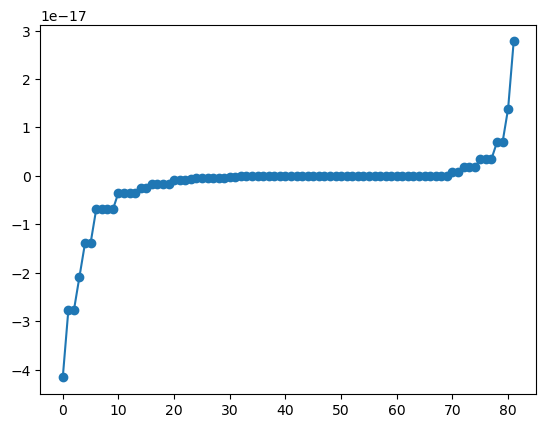

0.6751730410839226 [6.35451408e-04 1.25057143e-02 2.94702166e-02 9.99487223e-01]


In [52]:
wma = af.averaging_function("WM", rhofunc=func.Sqrt(0.1), alpha=0.97)
a4, L4 = pca.find_rob_pc(XY4, wma)
plt.plot(sorted(pca.distance_line(XY4, a4)), marker='o')
plt.show()
print(L4, a4)

In [53]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [54]:
S = robust_scatter_matrix(XY1, wma)
print(S)

[[ 3.61524885e-02  9.72751609e-02 -2.67583043e-02 -1.44818699e-01]
 [ 9.72751609e-02  1.73304626e+00  6.28748603e-02  2.81151758e+00]
 [-2.67583043e-02  6.28748603e-02  2.70828521e-01  4.19382752e+00]
 [-1.44818699e-01  2.81151758e+00  4.19382752e+00  1.46606256e+02]]


In [55]:
L, A = np.linalg.eig(S)
print(A)

[[ 9.78652955e-04 -6.07491671e-02 -9.83682654e-01 -1.69342900e-01]
 [-1.93835223e-02 -9.97890155e-01  5.77334176e-02  2.25026537e-02]
 [-2.86162002e-02  1.29080090e-02 -1.70374515e-01  9.84879191e-01]
 [-9.99402038e-01  1.89251120e-02  2.79538183e-03 -2.88026316e-02]]


In [56]:
print(a1)
print(a2)
print(a3)
print(a4)

[ 0.98154247 -0.09618344  0.16524131 -0.00429278]
[-0.16206442  0.040545    0.98550657 -0.02946226]
[ 0.1015337   0.99445888 -0.02456857 -0.01178294]
[6.35451408e-04 1.25057143e-02 2.94702166e-02 9.99487223e-01]
